## PRUEBAS AB

Descripción del proyecto
Contexto
Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

1. Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
2. Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
3. Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

Parte 2. Análisis de test A/B
Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv.

Analiza el test A/B:

1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. 5.5. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

In [44]:
#importamos las librerias necesarias
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [45]:
#leemos los archivos csv
hipotesis = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\github\testAB\testAB\hypotheses_us.csv', sep = ';')
orders_df = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\github\testAB\testAB\orders_us.csv')
visits_df = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\github\testAB\testAB\visits_us.csv')

In [46]:
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [47]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [48]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


1. Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [49]:
#mostramos el dataframe hipotesis 
hipotesis 


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [50]:
#creamos una columna con el framework ICE y lo calculamos impact * confidence / effort
hipotesis['ice'] = (hipotesis['Impact'] * hipotesis['Confidence'] / hipotesis['Effort'])
hipotesis.sort_values(by = 'ice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Effort,ice
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


El ICE presenta la 1, 9 y 8  como las hipótesis más prometedoras.


2. Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [51]:
#creamos una columna llamada RICE
hipotesis['rice'] = hipotesis['Reach'] * hipotesis['Impact'] * hipotesis['Confidence'] / hipotesis['Effort']
hipotesis.sort_values(by = 'rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ice,rice
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


Las hipotesis que mas RICE obtuvieron son la 8 3 y 1 lo que indica que habrá un mayor impacto y menor esfuerzo, maximizando el retorno de la inversión en términos de tiempo y recursos.

3. Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [52]:
hipotesis[['Hypothesis','rice','ice']].sort_values(by = 'rice', ascending=False)

,Hypothesis,rice,ice
7,Add a subscription form to all the main pages....,112.0,11.200000
2,Add product recommendation blocks to the store...,56.0,7.000000
0,Add two new channels for attracting traffic. T...,40.0,13.333333
6,Show banners with current offers and sales on ...,40.0,8.000000
8,Launch a promotion that gives users discounts ...,16.2,16.200000
3,Change the category structure. This will incre...,9.0,1.125000
1,Launch your own delivery service. This will sh...,4.0,2.000000
5,Add a customer review page. This will increase...,4.0,1.333333
4,Change the background color on the main page. ...,3.0,1.000000


El método RICE prioriza las hipótesis no solo basándose en su impacto, confianza y esfuerzo, sino también en el número de usuarios afectados (Reach). Esto puede cambiar significativamente la priorización, dándole más importancia a las hipótesis que afectan a un mayor número de usuarios. En este caso, H7 se benefició enormemente del factor Reach, subiendo al primer lugar, mientras que H8, que tenía la mayor puntuación ICE, bajó varios puestos debido a su menor alcance.

Parte 2. Análisis de test A/B
Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv.

Analiza el test A/B:

1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [56]:
#mostramos el dataframe
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [73]:
#mostramos los ingresos acumulados por grupo
revenue_sum = orders_df.groupby('group')['revenue'].sum().reset_index(name = 'revenue_sum')
revenue_sum

,group,revenue_sum
0,A,64554.9
1,B,92840.6


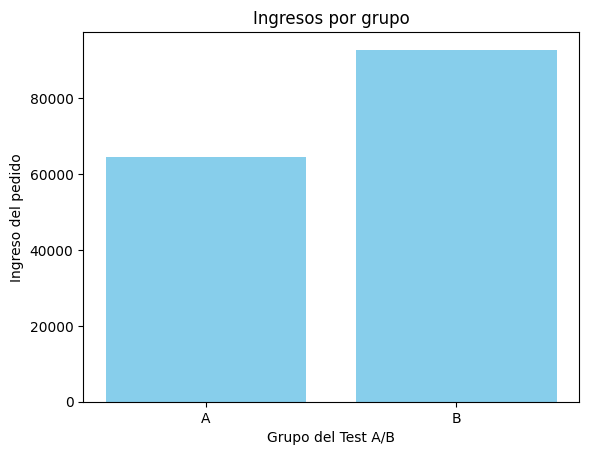

In [74]:
#mostramos graficamente los ingresos acumulados por grupo
plt.bar(revenue_sum['group'], revenue_sum['revenue_sum'], color = 'skyblue' )
plt.title('Ingresos por grupo')
plt.xlabel('Grupo del Test A/B')
plt.ylabel('Ingreso del pedido')
plt.show()

Se perciben mas ingresos del grupo de prueba B que del A, con una diferencia de 28,285 dólares.

2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

In [70]:
#agrupamos por grupo de test y calculamos su promedio de ingresos de los pedidos
revenue_average = orders_df.groupby('group')['revenue'].mean().reset_index(name = 'revenue_average')
revenue_average

,group,revenue_average
0,A,115.897487
1,B,145.063438


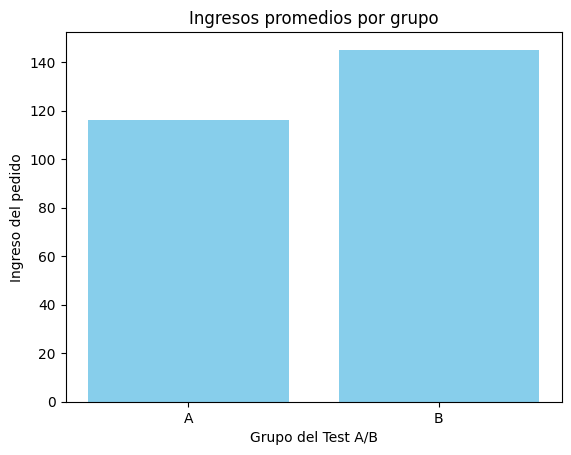

In [75]:
#mostramos graficamente los ingresos promedios por grupo
plt.bar(revenue_average['group'], revenue_average['revenue_average'], color = 'skyblue' )
plt.title('Ingresos promedios por grupo')
plt.xlabel('Grupo del Test A/B')
plt.ylabel('Ingreso del pedido')
plt.show()

El grupo de test B genera mas ingresos en promedio que el grupo A.

3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [79]:
#imprimo el dataframe orders
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [114]:
#calculamos el tamaño de cada grupo por fecha
size_group = orders_df.pivot_table(index = 'date', columns= 'group', values = 'transactionId', aggfunc= 'nunique').reset_index().rename({'group': 'index'})
size_group.head()

group,date,A,B
0,2019-08-01,24,21
1,2019-08-02,20,24
2,2019-08-03,24,16
3,2019-08-04,16,17
4,2019-08-05,25,23


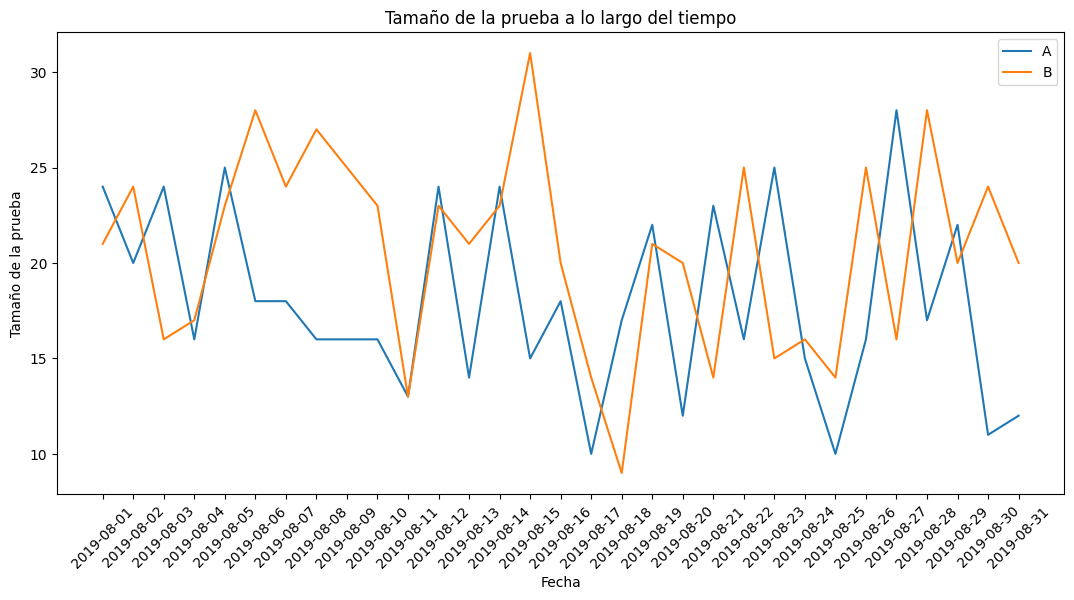

In [122]:
#mostramos como cambia el tamaño de la prueba a lo largo del tiempo
group = ['A', 'B']
plt.figure(figsize=(13,6))
plt.plot(size_group['date'], size_group['A'], size_group['B'])
plt.xticks(rotation = 45)
plt.xlabel('Fecha')
plt.ylabel('Tamaño de la prueba')
plt.title('Tamaño de la prueba a lo largo del tiempo')
plt.legend(labels = group)
plt.show()

In [118]:
size_group.head()

group,date,A,B
0,2019-08-01,24,21
1,2019-08-02,20,24
2,2019-08-03,24,16
3,2019-08-04,16,17
4,2019-08-05,25,23


In [121]:
#calculamos el tamaño acumulado de los grupos
size_group['relative_size'] = ((size_group['A'] - size_group['B']) / size_group['A'] * 100).lamb
size_group.head()

group,date,A,B,relative_size
0,2019-08-01,24,21,12.500000
1,2019-08-02,20,24,-20.000000
2,2019-08-03,24,16,33.333333
3,2019-08-04,16,17,-6.250000
4,2019-08-05,25,23,8.000000
